In [2]:
pip install py-ecg-detectors


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.5/554.5 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 29.3 MB/s eta 0:00:00
  Created wheel for gatspy: filename=gatspy-0.3-py3-none-any.whl size=43804 sha256=69531c2a5cd392a978c75a9a39fd8caffc6be70009d7321cbbf3dcf726da9c00
  Stored in directory: /root/.cache/pip/wheels/4c/f6/62/023194c77c6e9a7c3316fd0052706cedacebe136926fb99332
Successfully built gatspy


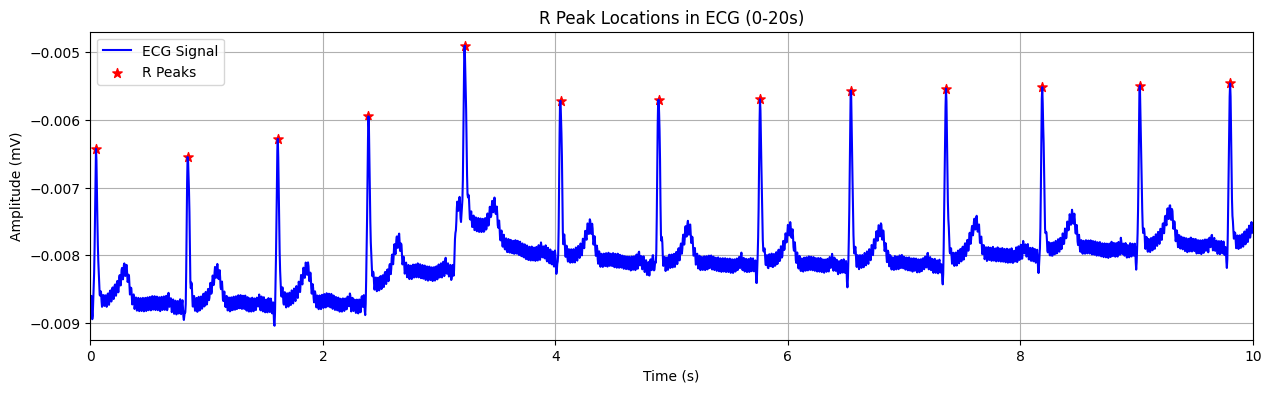

In [19]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

# Load ECG Data
url = "https://raw.githubusercontent.com/berndporr/py-ecg-detectors/master/example_data/ECG.tsv"
ecg_data = pd.read_csv(url, sep="\s+", header=None)  # Use whitespace separator

# Extract ECG signal (second column)
ecg_signal = ecg_data.iloc[:, 1].to_numpy().astype(float)

# Define Sampling Frequency (fs)
fs = 250  # Adjust based on actual sampling rate

# Generate Time Axis
time = np.arange(len(ecg_signal)) / fs  # Time in seconds

# Detect R-peaks
peaks, _ = find_peaks(ecg_signal, distance=int(fs * 0.6), height=np.mean(ecg_signal) + 0.5 * np.std(ecg_signal))

# Filter data for 0-20s time window
time_mask = time <= 10
time_zoomed = time[time_mask]
ecg_zoomed = ecg_signal[time_mask]

# Adjust peak locations to match zoomed time frame
peaks_zoomed = peaks[time[peaks] <= 10]

# Plot ECG with R-peaks (Zoomed)
plt.figure(figsize=(15, 4), dpi=100)
plt.plot(time_zoomed, ecg_zoomed, color='blue', label="ECG Signal")
plt.scatter(time[peaks_zoomed], ecg_signal[peaks_zoomed], color='red', s=50, marker='*', label="R Peaks")
plt.xlim(0, 10)  # Set x-axis limit
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")
plt.title("R Peak Locations in ECG (0-20s)")
plt.legend()
plt.grid()
plt.show()
